# Color Image Processing

## Packages

In [3]:
import numpy as np;
import matplotlib.pyplot as plt;
import cv2;

## Creating a Color Image

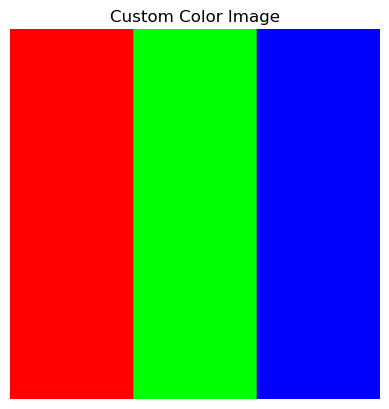

In [19]:
color_image = np.zeros((300, 300, 3), dtype=np.uint8)

# Add colors to the image
color_image[:, :100] = [255, 0, 0]  # Red region
color_image[:, 100:200] = [0, 255, 0]  # Green region
color_image[:, 200:] = [0, 0, 255]  # Blue region

# Display the created image
plt.imshow(color_image)
plt.title("Custom Color Image")
plt.axis('off')
plt.show()

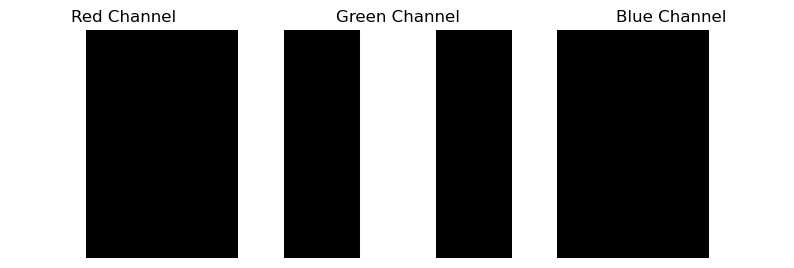

In [20]:
# Displaying each channel

fig, ax = plt.subplots(1,3, figsize=(10,10));

ax[0].imshow(color_image[:,:,0], 'gray');
ax[0].set_title("Red Channel");
ax[0].axis('off');

ax[1].imshow(color_image[:,:,1], 'gray');
ax[1].set_title("Green Channel");
ax[1].axis('off');

ax[2].imshow(color_image[:,:,2], 'gray');
ax[2].set_title("Blue Channel");
ax[2].axis('off');

plt.show();

### Visualizing individual color channels

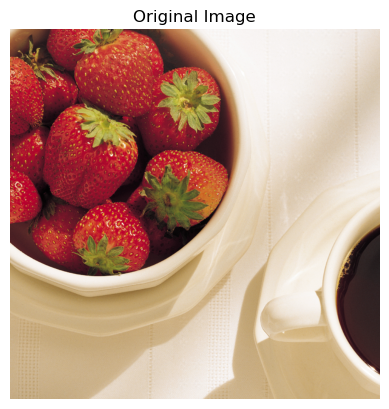

In [4]:
img = plt.imread(r'images\Fig0630(01)(strawberries_fullcolor).tif');

plt.imshow(img);
plt.title("Original Image");
plt.axis('off');
plt.show();

In [5]:
### Splitting color channels.

R = img[:,:,0];
G = img[:,:,1];
B = img[:,:,2];

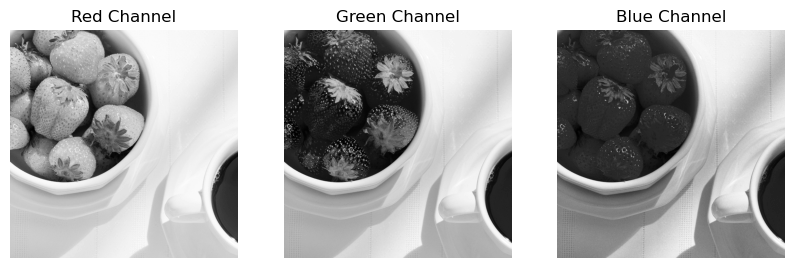

In [17]:
# Displaying each channel

fig, ax = plt.subplots(1,3, figsize=(10,10));

ax[0].imshow(R, 'gray');
ax[0].set_title("Red Channel");
ax[0].axis('off');

ax[1].imshow(G, 'gray');
ax[1].set_title("Green Channel");
ax[1].axis('off');

ax[2].imshow(B, 'gray');
ax[2].set_title("Blue Channel");
ax[2].axis('off');

plt.show();

### Working in the RGB space, create squares colored with varying proportions of Red and White.

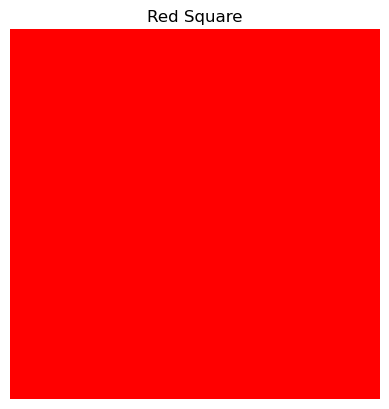

In [26]:
img = np.zeros((10,10,3), dtype='B');
img[:,:,0] = 255;

plt.imshow(img);
plt.title("Red Square");
plt.axis('off');
plt.show();

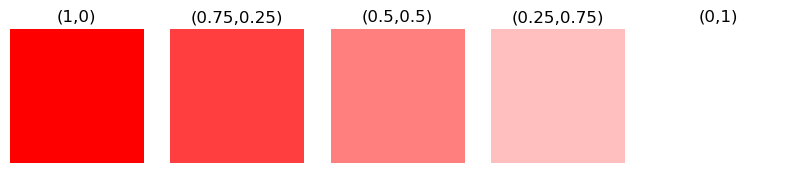

In [28]:
# White and Blue Channels
blue = np.array([255, 0, 0]);
white = np.array([255, 255, 255]);

# Define proportions for each square
proportions = [(1, 0), (3/4, 1/4), (1/2, 1/2), (1/4, 3/4), (0, 1)];

# Figure of size 5 to desply subplots
fig, ax = plt.subplots(1, len(proportions), figsize=(10, 2));

for i, (b,w) in enumerate(proportions):
    color = b*blue + w*white;
    img[:,:,:] = color;
    ax[i].imshow(img);
    ax[i].set_xlim(0, 1);
    ax[i].set_ylim(0, 1);
    ax[i].set_title(f'({b},{w})');
    ax[i].axis('off');

## Pseudocolor Image Processing

### Intensity Slicing

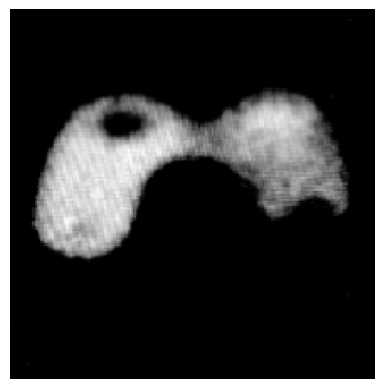

In [34]:
img = cv2.imread(r"images\Fig0620(a)(picker_phantom).tif", 0);

plt.imshow(img, cmap="gray");
plt.axis('off');
plt.show();

In [47]:
height, width = img.shape
pseudo_img = np.zeros((height, width, 3), dtype=np.uint8)
pseudo_img[:,:, 0] = img;
pseudo_img[:,:, 1] = img;
pseudo_img[:,:, 2] = img;

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (img[i,j]>100 and img[i,j]<=120):
            pseudo_img[i,j] = [255, 80, 80];
        elif (img[i,j]>120 and img[i,j]<=130):
            pseudo_img[i,j] = [255, 255, 255];
        else:
            pass;

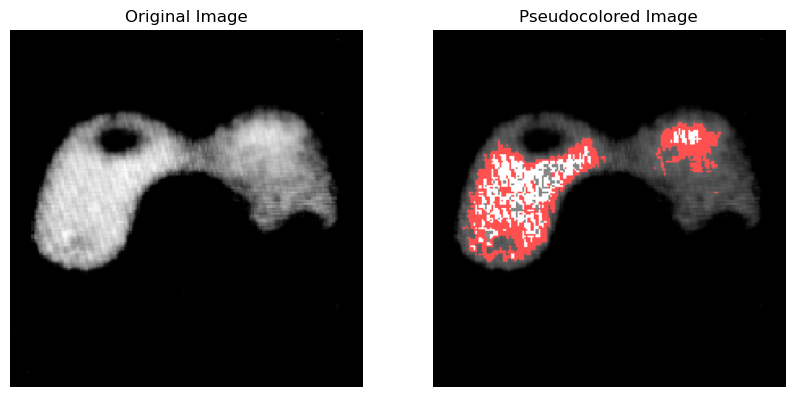

In [48]:
fig, ax = plt.subplots(1,2, figsize=(10,10));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(pseudo_img, 'gray');
ax[1].set_title("Pseudocolored Image");
ax[1].axis('off');

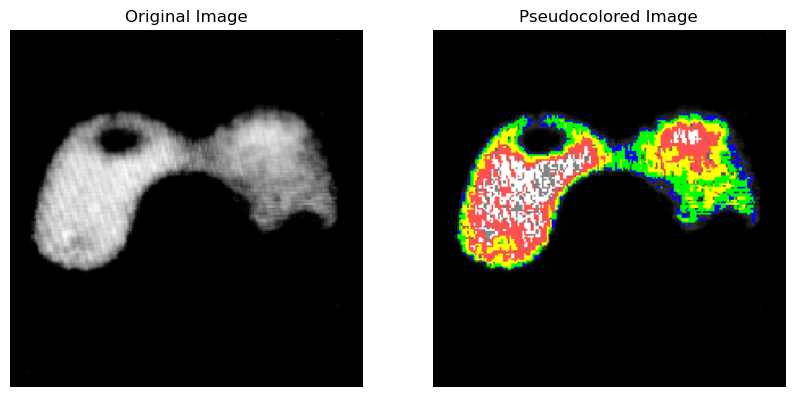

In [55]:
pseudo_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
pseudo_img[:,:, 0] = img;
pseudo_img[:,:, 1] = img;
pseudo_img[:,:, 2] = img;

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (img[i,j]>100 and img[i,j]<120):
            pseudo_img[i,j] = [255,80,80]
        if (img[i,j]>120 and img[i,j]<130):
            pseudo_img[i,j] = [255,255,255] 
        if (img[i,j]>80 and img[i,j]<100):
            pseudo_img[i,j] = [255,255,0]
        if (img[i,j]>60 and img[i,j]<80):
            pseudo_img[i,j] = [0,255,0]
        if (img[i,j]>=50 and img[i,j]<60):
            pseudo_img[i,j] = [0,0,255]

fig, ax = plt.subplots(1,2, figsize=(10,10));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(pseudo_img, 'gray');
ax[1].set_title("Pseudocolored Image");
ax[1].axis('off');

### Second Approach

In [52]:
pseudo_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
pseudo_img[:,:, 0] = img;
pseudo_img[:,:, 1] = img;
pseudo_img[:,:, 2] = img;

# Define intensity ranges and colors
# (lower, upper, [color])
intensity_ranges = [
    (100, 120, [255, 80,  80]),
    (120, 130, [255, 255, 255]),
    (80, 100,  [255, 255, 0]),
    (60, 80,   [0,   255, 0]),
    (50, 60,   [0,   0,   255]),
]

# Apply the intensity slicing
for intensity_range in intensity_ranges:
    lower, upper, color = intensity_range
    mask = (img >= lower) & (img <= upper)
    pseudo_img[mask] = color

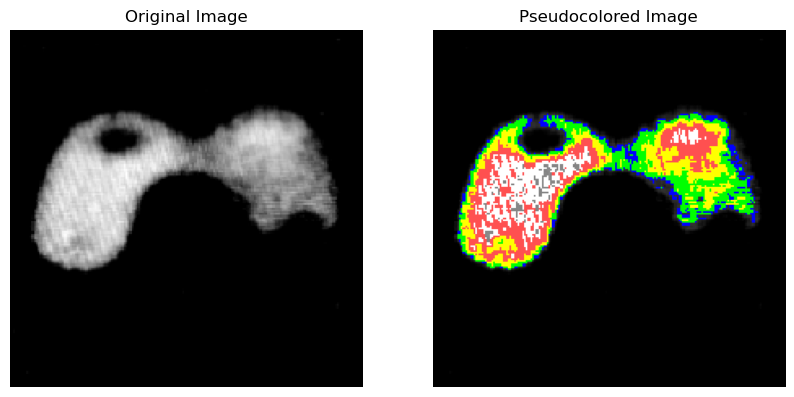

In [53]:
fig, ax = plt.subplots(1,2, figsize=(10,10));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(pseudo_img, 'gray');
ax[1].set_title("Pseudocolored Image");
ax[1].axis('off');

### Color Coding

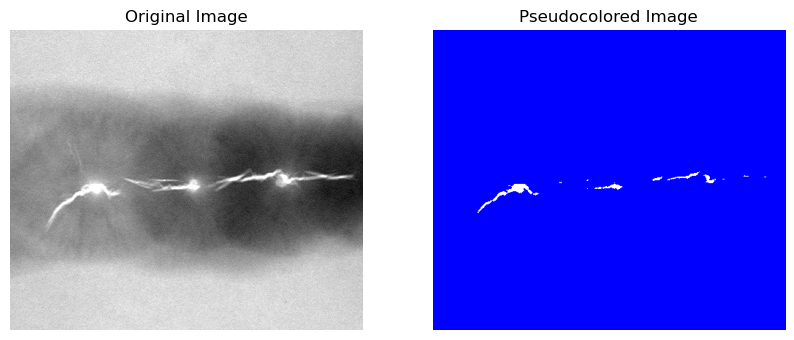

In [63]:
img = cv2.imread(r"images\Fig0621(a)(weld-original).tif", 0);

coded_img = np.zeros((img.shape[0], img.shape[1], 3), dtype='B');
coded_img[:,:,0] = img;
coded_img[:,:,1] = img;
coded_img[:,:,2] = img;

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j]<254:
            coded_img[i,j] = [0, 0, 255];
        else:
            coded_img[i,j] = 255;

fig, ax = plt.subplots(1,2, figsize=(10,10));

ax[0].imshow(img, 'gray');
ax[0].set_title("Original Image");
ax[0].axis('off');

ax[1].imshow(coded_img, 'gray');
ax[1].set_title("Pseudocolored Image");
ax[1].axis('off');

## Color Transformation

### Modifying intensity in RGB color space

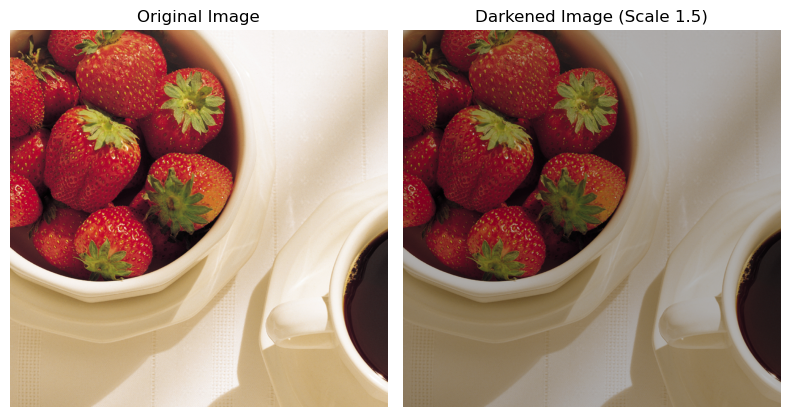

In [10]:
image = cv2.imread(r"images\Fig0631(a)(strawberries_coffee_full_color).tif");
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB);

# Adjust intensity
scale_factor = 0.7  # Example: >1 for brightening, <1 for darkening
modified_image = np.clip(image_rgb * scale_factor, 0, 255).astype(np.uint8)

# Visualize the results
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Darkened Image (Scale 1.5)")
plt.imshow(modified_image)
plt.axis("off")

plt.tight_layout()
plt.show()
